# Skew T Diagrams

## Overview

Summary text here

1. 

## Prerequisites

| Concepts | Importance | Notes |
| --- | --- | --- |
| []() | Necessary | |

- **Time to learn**: X minutes


---

## What is a Skew-T plot?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from metpy.plots import SkewT
import metpy.calc as mpcalc


If you want to get your own sounding data, run the following code in a new cell using the date and station of your choice:

```python
from datetime import datetime
from siphon.simplewebservice.wyoming import WyomingUpperAir

date = datetime(2023, 11, 20, 12)
station = 'GJT'
df = WyomingUpperAir.request_data(date, station)|
```

We've already done this for you and saved the data in a file, `notebooks/data/gjt_sounding.csv` for you to use. We'll use that file's data for the rest of the notebook

In [2]:
df = pd.read_csv('data/gjt_sounding.csv')
df

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation,pw
0,853.0,1475,5.2,2.0,305.0,3.0,2.457456,-1.720729,GJT,72476,2023-11-20 12:00:00,39.11,-108.53,1475.0,9.12
1,850.0,1508,7.2,1.2,280.0,13.0,12.802501,-2.257426,GJT,72476,2023-11-20 12:00:00,39.11,-108.53,1475.0,9.12
2,848.0,1527,7.4,1.4,287.0,13.0,12.431962,-3.800832,GJT,72476,2023-11-20 12:00:00,39.11,-108.53,1475.0,9.12
3,831.0,1693,6.4,-2.6,350.0,15.0,2.604723,-14.772116,GJT,72476,2023-11-20 12:00:00,39.11,-108.53,1475.0,9.12
4,820.0,1802,5.4,-2.8,10.0,13.0,-2.257426,-12.802501,GJT,72476,2023-11-20 12:00:00,39.11,-108.53,1475.0,9.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,13.4,28951,-55.7,-85.7,53.0,17.0,-13.576804,-10.230855,GJT,72476,2023-11-20 12:00:00,39.11,-108.53,1475.0,9.12
148,13.0,29144,-55.5,-85.5,75.0,20.0,-19.318517,-5.176381,GJT,72476,2023-11-20 12:00:00,39.11,-108.53,1475.0,9.12
149,12.7,29293,-55.3,-85.3,NaN,NaN,NaN,NaN,GJT,72476,2023-11-20 12:00:00,39.11,-108.53,1475.0,9.12
150,12.1,29601,-55.5,-85.5,NaN,NaN,NaN,NaN,GJT,72476,2023-11-20 12:00:00,39.11,-108.53,1475.0,9.12


In [3]:
p = df['pressure'].values
T = df['temperature'].values
Td = df['dewpoint'].values
u = df['u_wind'].values
v = df['v_wind'].values

## Elements of a Skew-T Plot
Let's start out by talking about the structural elements of a Skew-T plot.

1. **Temperature Lines**: These lines are drawn at an angle up from the x-axis and are where the name "Skew-T" comes from.
2. **Pressure Lines**: These lines are horizontal from the y-axis, where pressure is plotted at a logarithmic scale.
3. **Dry Adiabats**:
4. **Moist Adiabats**:
5. **Mixing Ratio Lines**:

On all those structural elements, Skew-T plots have two lines plotted on them, **air temperature** and **dew point**. In this notebook, we'll be plotting the air temperature in red and the dew point in blue.

Additionally, Skew-T plots have **wind barbs**. These describe the wind speed and direction at different pressure levels and are plotted on the right side of the diagram.

:::{tip}
For a more detailed description and a cool interactive diagram, visit [NOAA's Skew-T page](https://www.noaa.gov/jetstream/upperair/skew-t-log-p-diagrams).
:::

## Making a Skew-T plot in Python (with MetPy!)
So, all of that might seem a little abstract without a visual. We're going to use MetPy's SkewT module to make an actual Skew-T plot with the sounding data we downloaded earlier.

From the [MetPy documentation](https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.SkewT.html):
> "This class simplifies the process of creating Skew-T log-P plots in using matplotlib. It handles requesting the appropriate skewed projection, and provides simplified wrappers to make it easy to plot data, add wind barbs, and add other lines to the plots (e.g. dry adiabats)"

### Just the basics
To start with, let's create a very minimal Skew-T plot with just the pressure and temperature lines under the sounding data.

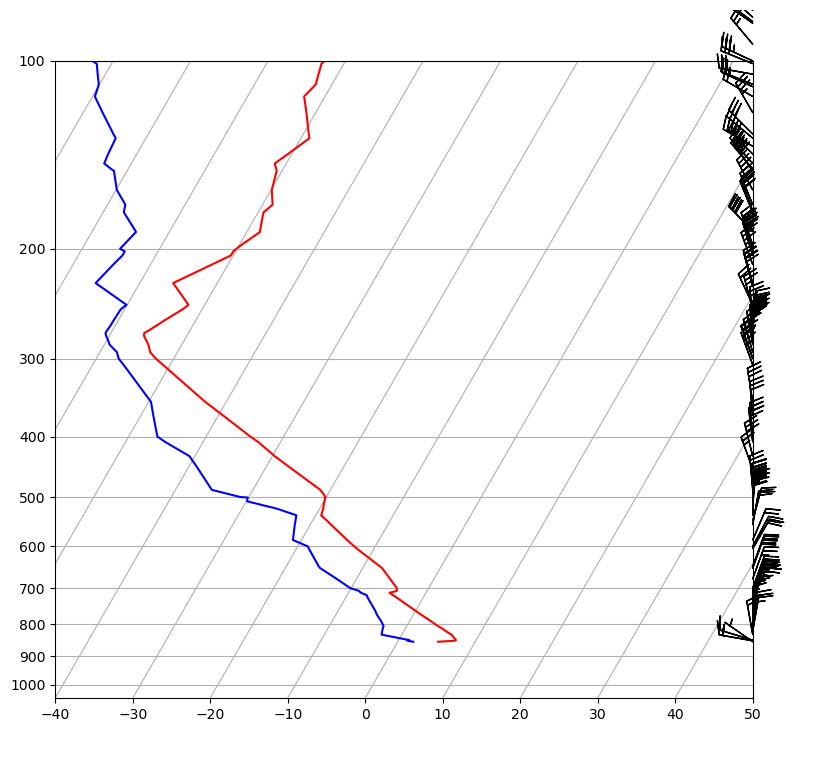

In [4]:
# make figure and `SkewT` object
fig = plt.figure(figsize=(9, 9))
skewt = SkewT(fig=fig)

# plot sounding data
skewt.plot(p, T, 'r') # air temperature
skewt.plot(p, Td, 'b') # dew point
skewt.plot_barbs(p, u, v) # wind barbs



Then, we're going to plot the air temperature and dew point and add the wind barbs.

Let's talk break that down a bit.
    
```python showLineNumbers highlightLine=2-3
# make figure and `SkewT` object
fig = plt.figure(figsize=(9, 9))
skewt = SkewT(fig=fig)

# plot sounding data
skewt.plot(p, T, 'r') # air temperature
skewt.plot(p, Td, 'b') # dew point
skewt.plot_barbs(p, u, v) # wind barbs
```
First, we'll make a new figure and use that figure to make a new skew-T plot. If you don't provide a figure to `SkewT`, one will be created for you, but it's useful to make the default figure size a bit larger for this tutorial.

First, we're 

In [8]:
dir(skewt)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_fig',
 'ax',
 'dry_adiabats',
 'mixing_lines',
 'moist_adiabats',
 'plot',
 'plot_barbs',
 'plot_dry_adiabats',
 'plot_mixing_lines',
 'plot_moist_adiabats',
 'shade_area',
 'shade_cape',
 'shade_cin']

## Summary

### What's next?


## Resources and references

- [Wyoming Upper Air](https://weather.uwyo.edu/upperair/)
- [Siphon](https://unidata.github.io/siphon/latest/examples/upperair/Wyoming_Request.html)
- [MetPy's SkewT documentation](https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.SkewT.html)
- [NOAA's JetStream](https://www.noaa.gov/jetstream) [Skew-T Plot](https://www.noaa.gov/jetstream/upperair/skew-t-plots) Section